In [29]:
In this project, we will do the homework for the Python Project for Data Science course of the IBM course.

Rules and necessary steps:
                                                       
There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points          -- Step 2
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points     -- Step 3 
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points       -- Step 4
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points  -- Step 5
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points                   -- Step 6 
Question 6 - GameStop Stock and Revenue Dashboard- 2 Points                 -- Step 7
Question 7 - Sharing your Assignment Notebook - 2 Points


SyntaxError: invalid syntax (3793443719.py, line 1)

In [31]:
# I don't want to see warnings 

import sys
import warnings

warnings.filterwarnings("ignore")

In [33]:
# If yfinance is not installed in your libraries
pip install yfinance

SyntaxError: invalid syntax (4229017280.py, line 2)

In [35]:
# Step 1: First we download the necessary libraries

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Step 2: Get Tesla stock (TSLA) stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")

tesla_data.reset_index(inplace=True)

def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all("table")
    
    for table in tables:
        df = pd.read_html(str(table))[0]
        if "Revenue" in df.columns:
            return df
    return None

In [41]:
# Step 3: Getting Tesla Revenue Data with Web Scraping
tesla_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")
if tesla_revenue is not None:
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue.dropna(inplace=True)
else:
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tsla_combined = tesla_data.merge(tesla_revenue, on="Date", how="left")

In [43]:
# Step 4: Get GameStop (GME) stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")

gme_data.reset_index(inplace=True)

In [45]:
# Step 5: Getting GameStop Revenue Data with Web Scraping
gme_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")
if gme_revenue is not None:
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue.dropna(inplace=True)
else:
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

gme_combined = gme_data.merge(gme_revenue, on="Date", how="left")


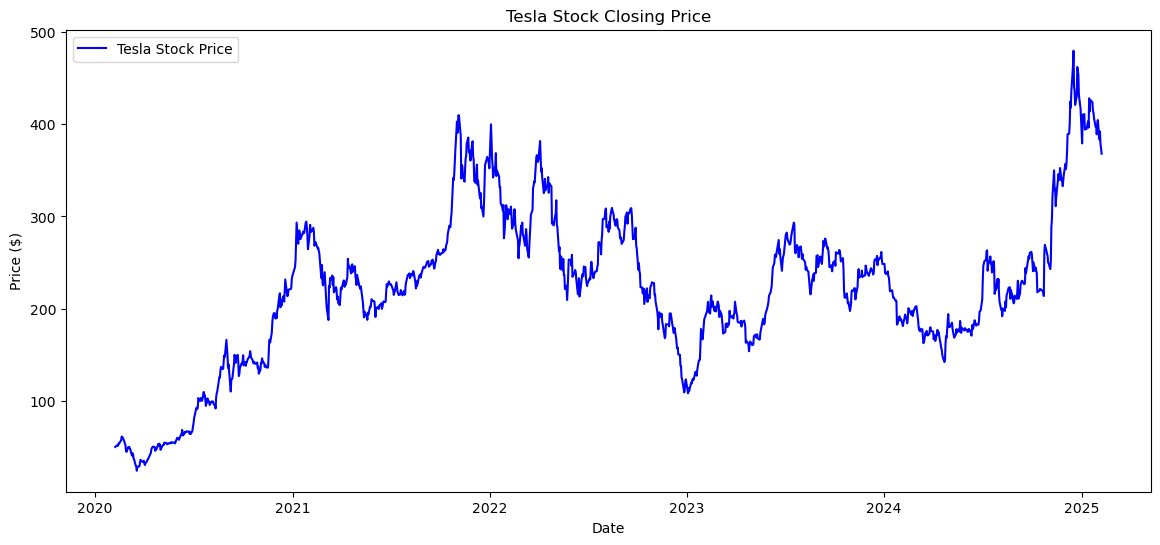

In [51]:
# Step 6: Tesla Dashboard
plt.figure(figsize=(14,6))
sns.lineplot(data=tesla_data, x="Date", y="Close", label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

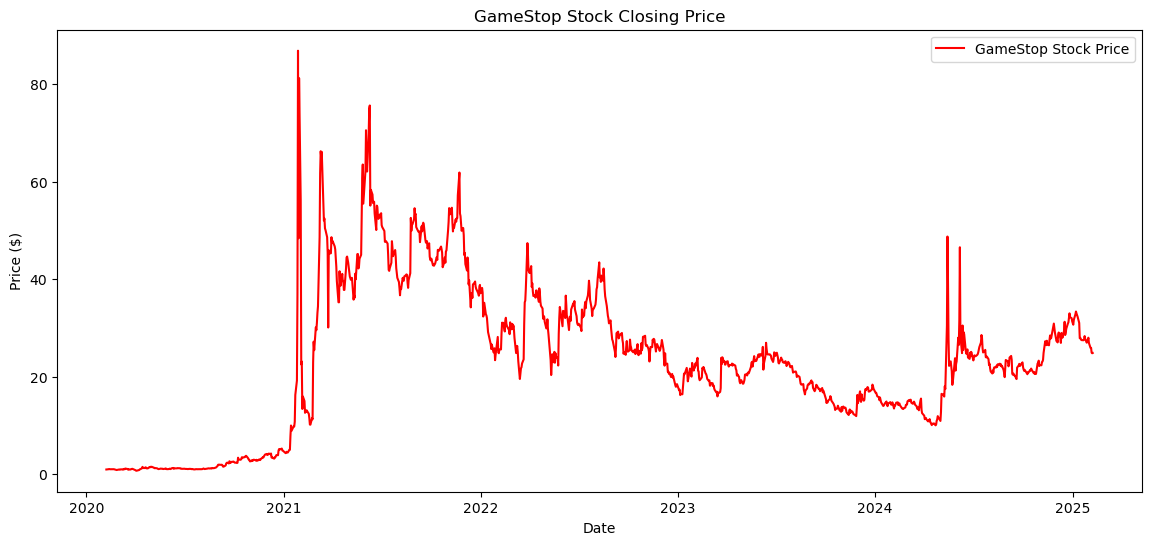

In [53]:
# Step 7: GameStop Dashboard
plt.figure(figsize=(14,6))
sns.lineplot(data=gme_data, x="Date", y="Close", label="GameStop Stock Price", color="red")
plt.title("GameStop Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()